# Import Library

In [1]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import LayerControl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Load Data

In [2]:
df = pd.read_csv('data_pju_clean.csv', delimiter=';')

In [3]:
gdf_kabtasik = gpd.read_file("maps_kabtasik.geojson")

# Exploratory Data Analysis

In [4]:
df.head()

,No,Lokasi,Kecamatan_Baru,Titik Koordinat,Lokasi Pemasangan,Kondisi,Jenis PJU,Jenis Tiang,Jenis Lampu
0,1,"Puspa, Ds. Wakaf Kec. Bantarkalong",Bantarkalong,-7.520229 108.084697,Kanan,Baik,PJU Konvensional,Tiang Stang,Mercury
1,2,"Puspa, Ds. Wakaf Kec. Bantarkalong",Bantarkalong,-7.522890 108.084678,Kanan,Baik,PJU Konvensional,Tiang Tunggal,SON T
2,3,"Cibiru, Ds. Wakaf Kec. Bantarkalong",Bantarkalong,-7.529602 108.083917,Kanan,Baik,PJU Solar Cell,Tiang Tunggal,LED
3,4,"Leuwinanggung, Ds. Sukamaju, Kec. Bantarkalong",Bantarkalong,-7.537505 108.092379,Kanan,Baik,PJU Konvensional,Tiang Tunggal,SON T
4,5,"Datarrandu, Ds. Sukamaju, Kec. Bantarkalong",Bantarkalong,-7.537466 108.092989,Kanan,Baik,PJU Solar Cell,Tiang Tunggal,LED


In [5]:
# Melihat dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 5589
Jumlah kolom: 9


In [6]:
# Melihat informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No                 5589 non-null   int64 
 1   Lokasi             5589 non-null   object
 2   Kecamatan_Baru     5396 non-null   object
 3   Titik Koordinat    5517 non-null   object
 4   Lokasi Pemasangan  520 non-null    object
 5   Kondisi            5589 non-null   object
 6   Jenis PJU          5589 non-null   object
 7   Jenis Tiang        5589 non-null   object
 8   Jenis Lampu        5589 non-null   object
dtypes: int64(1), object(8)
memory usage: 393.1+ KB


In [7]:
# Melihat beberapa sample data
df.sample(5)

,No,Lokasi,Kecamatan_Baru,Titik Koordinat,Lokasi Pemasangan,Kondisi,Jenis PJU,Jenis Tiang,Jenis Lampu
2854,2855,"Jalan asrama ci liwung,Mangunreja,Mangunreja",Tidak Diketahui,-7.3762935 108.0949632,NaN,Baik,PJU Konvensional,Tiang Tunggal,Mercury
3346,3347,"Jl sinar sari,Sirnasari,Sariwangi",Tidak Diketahui,-7.3345583 108.0665315,NaN,Baik,PJU Konvensional,Tiang Tunggal,SON T
4527,4528,Jl pahlawan KHZ Mustofa Wargakerta Sukarame,Tidak Diketahui,-7.3826795 108.1467654,NaN,Baik,PJU Konvensional,Tiang Tunggal,SON T
3502,3503,"Jl.rancamaya,Cikunten ,Singaparna",Tidak Diketahui,-7.362188 108.102647,NaN,Baik,PJU Konvensional,Tiang Tunggal,SON T
4118,4119,Bojong sipatnunggal SEPATNUNGGAL Sodonghilir,Tidak Diketahui,"7.519806,108.073803",NaN,Baik,PJU Konvensional,Tiang Tunggal,Mercury


In [8]:
# Menghapus variabel yang tidak diperlukan
hapus = ['No', 'Kecamatan_Baru', 'Lokasi Pemasangan']
df.drop(columns=hapus, inplace=True)
df.head()

,Lokasi,Titik Koordinat,Kondisi,Jenis PJU,Jenis Tiang,Jenis Lampu
0,"Puspa, Ds. Wakaf Kec. Bantarkalong",-7.520229 108.084697,Baik,PJU Konvensional,Tiang Stang,Mercury
1,"Puspa, Ds. Wakaf Kec. Bantarkalong",-7.522890 108.084678,Baik,PJU Konvensional,Tiang Tunggal,SON T
2,"Cibiru, Ds. Wakaf Kec. Bantarkalong",-7.529602 108.083917,Baik,PJU Solar Cell,Tiang Tunggal,LED
3,"Leuwinanggung, Ds. Sukamaju, Kec. Bantarkalong",-7.537505 108.092379,Baik,PJU Konvensional,Tiang Tunggal,SON T
4,"Datarrandu, Ds. Sukamaju, Kec. Bantarkalong",-7.537466 108.092989,Baik,PJU Solar Cell,Tiang Tunggal,LED


In [9]:
# Mengecek missing value
df.isnull().sum()

,0
Lokasi,0
Titik Koordinat,72
Kondisi,0
Jenis PJU,0
Jenis Tiang,0
Jenis Lampu,0


In [10]:
# Menghapus missing value
df.dropna(inplace=True)
df.isnull().sum()

,0
Lokasi,0
Titik Koordinat,0
Kondisi,0
Jenis PJU,0
Jenis Tiang,0
Jenis Lampu,0


In [11]:
# Memastikan data sudah bersih
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 5588
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lokasi           5517 non-null   object
 1   Titik Koordinat  5517 non-null   object
 2   Kondisi          5517 non-null   object
 3   Jenis PJU        5517 non-null   object
 4   Jenis Tiang      5517 non-null   object
 5   Jenis Lampu      5517 non-null   object
dtypes: object(6)
memory usage: 301.7+ KB


In [12]:
# Memisahkan kolom 'Titik Koordinat' menjadi Latitude dan Longitude
coords = df['Titik Koordinat'].str.split(' ', expand=True)

# Assign latitude and longitude, handling potential errors
df['Latitude'] = pd.to_numeric(coords[0], errors='coerce')
df['Longitude'] = pd.to_numeric(coords[1], errors='coerce')

print("Kolom 'Titik Koordinat' berhasil dipecah menjadi 'Latitude' dan 'Longitude'.")

Kolom 'Titik Koordinat' berhasil dipecah menjadi 'Latitude' dan 'Longitude'.


In [13]:
df.head()

,Lokasi,Titik Koordinat,Kondisi,Jenis PJU,Jenis Tiang,Jenis Lampu,Latitude,Longitude
0,"Puspa, Ds. Wakaf Kec. Bantarkalong",-7.520229 108.084697,Baik,PJU Konvensional,Tiang Stang,Mercury,-7.520229,108.084697
1,"Puspa, Ds. Wakaf Kec. Bantarkalong",-7.522890 108.084678,Baik,PJU Konvensional,Tiang Tunggal,SON T,-7.522890,108.084678
2,"Cibiru, Ds. Wakaf Kec. Bantarkalong",-7.529602 108.083917,Baik,PJU Solar Cell,Tiang Tunggal,LED,-7.529602,108.083917
3,"Leuwinanggung, Ds. Sukamaju, Kec. Bantarkalong",-7.537505 108.092379,Baik,PJU Konvensional,Tiang Tunggal,SON T,-7.537505,108.092379
4,"Datarrandu, Ds. Sukamaju, Kec. Bantarkalong",-7.537466 108.092989,Baik,PJU Solar Cell,Tiang Tunggal,LED,-7.537466,108.092989


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 5588
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lokasi           5517 non-null   object 
 1   Titik Koordinat  5517 non-null   object 
 2   Kondisi          5517 non-null   object 
 3   Jenis PJU        5517 non-null   object 
 4   Jenis Tiang      5517 non-null   object 
 5   Jenis Lampu      5517 non-null   object 
 6   Latitude         4644 non-null   float64
 7   Longitude        4850 non-null   float64
dtypes: float64(2), object(6)
memory usage: 387.9+ KB


In [15]:
# Menghapus baris yang memiliki nilai koordinat tidak valid
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
gdf_pju = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
print("GeoDataFrame PJU berhasil dibuat.")

GeoDataFrame PJU berhasil dibuat.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4636 entries, 0 to 5588
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lokasi           4636 non-null   object 
 1   Titik Koordinat  4636 non-null   object 
 2   Kondisi          4636 non-null   object 
 3   Jenis PJU        4636 non-null   object 
 4   Jenis Tiang      4636 non-null   object 
 5   Jenis Lampu      4636 non-null   object 
 6   Latitude         4636 non-null   float64
 7   Longitude        4636 non-null   float64
dtypes: float64(2), object(6)
memory usage: 326.0+ KB


# Klasifikasi kondisi PJU

In [17]:
# Membuat variabel target biner (Baik vs. Rusak)
df['Kondisi_Biner'] = df['Kondisi'].apply(
    lambda x: 0 if x == 'Baik' else 1
)

Mengklasifikasikan kondisi PJU menjadi:

Baik = 0

Rusak = 1

In [18]:
# Perbandingan PJU rusak dan baik
print(df['Kondisi_Biner'].value_counts())

Kondisi_Biner
0    4269
1     367
Name: count, dtype: int64


# Bangun GeoDataFrame titik PJU & baca data GeoJSON

In [19]:
# GeoDataFrame titik
gdf_pju = gpd.GeoDataFrame(
    df.copy(),
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326"
)

In [20]:
# Baca peta kecamatan
gdf_kecamatan = gpd.read_file("maps_kabtasik.geojson")
# Pastikan CRS WGS84
if gdf_kecamatan.crs is None or gdf_kecamatan.crs.to_epsg() != 4326:
    gdf_kecamatan = gdf_kecamatan.to_crs("EPSG:4326")

print("Kolom di geojson:", list(gdf_kecamatan.columns))
# Dari kamu: ['kd_propinsi','kd_dati2','kd_kecamatan','nm_kecamatan','geometry']
assert "nm_kecamatan" in gdf_kecamatan.columns, "Kolom 'nm_kecamatan' tidak ditemukan di GeoJSON."

Kolom di geojson: ['kd_propinsi', 'kd_dati2', 'kd_kecamatan', 'nm_kecamatan', 'geometry']


# Spatial Join: titik → kecamatan

In [21]:
# Spatial join (titik di dalam poligon)
# Gunakan predicate="within" (kalau ada titik di boundary, "intersects" juga ok)
gdf_joined = gpd.sjoin(gdf_pju, gdf_kecamatan[["nm_kecamatan","geometry"]], how="left", predicate="within")

In [22]:
# Simpan nama kecamatan final
gdf_joined = gdf_joined.rename(columns={"nm_kecamatan":"Kecamatan_Final"})


In [23]:
# Cek hasil
print("Contoh hasil spatial join:")
display(gdf_joined[["Latitude","Longitude","Kondisi","Kondisi_Biner","Kecamatan_Final"]].head())

Contoh hasil spatial join:


,Latitude,Longitude,Kondisi,Kondisi_Biner,Kecamatan_Final
0,-7.520229,108.084697,Baik,0,Bantarkalong
1,-7.522890,108.084678,Baik,0,Bantarkalong
2,-7.529602,108.083917,Baik,0,Bantarkalong
3,-7.537505,108.092379,Baik,0,Bantarkalong
4,-7.537466,108.092989,Baik,0,Bantarkalong


In [24]:
# Kalau ada titik yang masih NaN kecamatannya, berarti jatuh di luar polygon (cek koordinat/manual)
print("Jumlah titik tanpa kecamatan:", gdf_joined["Kecamatan_Final"].isna().sum())

Jumlah titik tanpa kecamatan: 116


In [25]:
# Menghapus titik tanpa kecamatan
gdf_joined = gdf_joined.dropna(subset=["Kecamatan_Final"])

In [26]:
# Cek ulang
print("Jumlah titik tanpa kecamatan:", gdf_joined["Kecamatan_Final"].isna().sum())

Jumlah titik tanpa kecamatan: 0


In [27]:
# Mengecek jumlah data bersih
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4520 entries, 0 to 5588
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Lokasi           4520 non-null   object  
 1   Titik Koordinat  4520 non-null   object  
 2   Kondisi          4520 non-null   object  
 3   Jenis PJU        4520 non-null   object  
 4   Jenis Tiang      4520 non-null   object  
 5   Jenis Lampu      4520 non-null   object  
 6   Latitude         4520 non-null   float64 
 7   Longitude        4520 non-null   float64 
 8   Kondisi_Biner    4520 non-null   int64   
 9   geometry         4520 non-null   geometry
 10  index_right      4520 non-null   float64 
 11  Kecamatan_Final  4520 non-null   object  
dtypes: float64(3), geometry(1), int64(1), object(7)
memory usage: 459.1+ KB


# Visualisasi

/tmp/ipython-input-2654152049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Kondisi_Biner', data=gdf_joined, palette='crest')


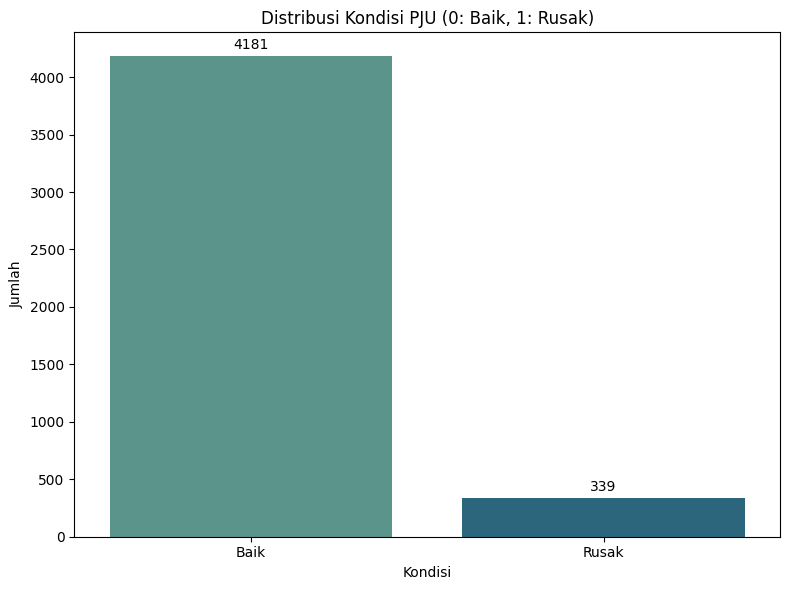

In [28]:
# Visualisasi 1: Perbandingan PJU berdasarkan Kondisi Biner
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Kondisi_Biner', data=gdf_joined, palette='crest')

plt.title('Distribusi Kondisi PJU (0: Baik, 1: Rusak)')
plt.xlabel('Kondisi')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Baik', 'Rusak'])

# Tambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('kondisi_pju_distribusi_biner.png')
plt.show()


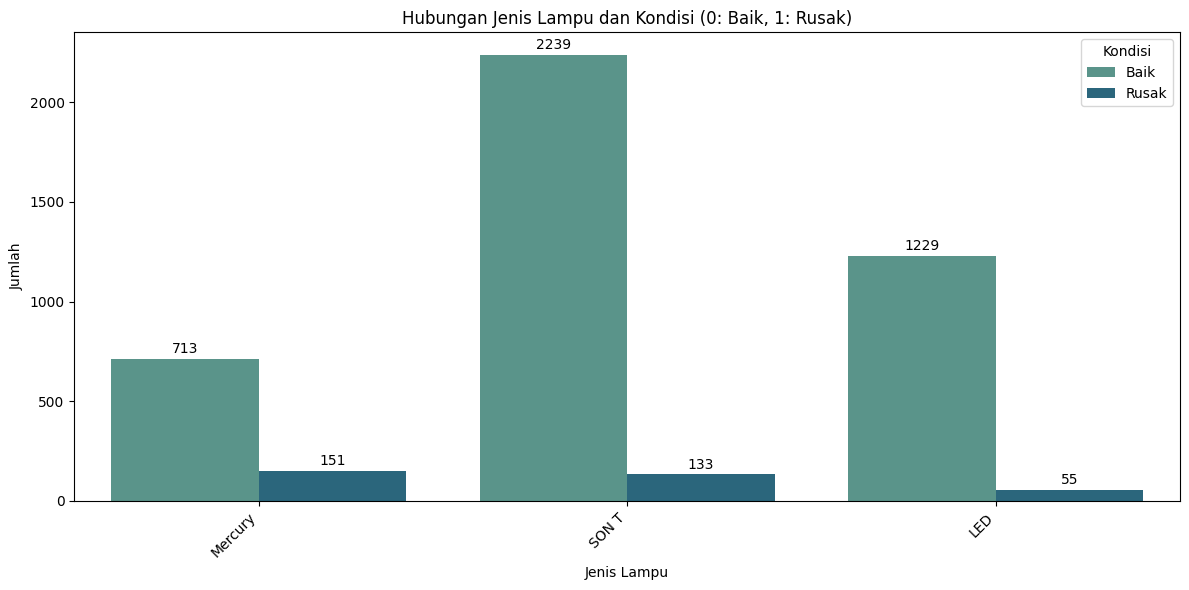

In [29]:
# Visualisasi 2: Hubungan antara Jenis Lampu dan Kondisi Biner
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Jenis Lampu', hue='Kondisi_Biner', data=gdf_joined, palette='crest')

plt.title('Hubungan Jenis Lampu dan Kondisi (0: Baik, 1: Rusak)')
plt.xlabel('Jenis Lampu')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kondisi', labels=['Baik', 'Rusak'])

# Tambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.savefig('jenis_lampu_vs_kondisi_biner.png')
plt.show()


In [30]:
# Simpan versi CSV final untuk arsip
gdf_joined.drop(columns="geometry").to_csv("data_pju_with_kecamatan.csv", index=False)

# Ringkasan per kecamatan & klasifikasi warna

In [31]:
# Hitung total PJU per kecamatan & jumlah rusak
pju_summary = gdf_joined.groupby("Kecamatan_Final").agg(
    total_pju=("Kondisi_Biner", "count"),
    rusak=("Kondisi_Biner", "sum")
).reset_index()

In [32]:
# Use the pju_summary DataFrame to calculate the percentage of damaged PJUs
pju_summary["persen_rusak"] = (pju_summary["rusak"] / pju_summary["total_pju"]) * 100

# Display the sub-districts with the highest percentage of damaged PJUs
display(pju_summary.sort_values("rusak", ascending=False).head())

,Kecamatan_Final,total_pju,rusak,persen_rusak
34,Sukarame,206,33,16.019417
21,Padakembang,229,31,13.537118
32,Sukahening,48,31,64.583333
20,Manonjaya,190,24,12.631579
3,Ciawi,198,24,12.121212


In [33]:
# Merge ke poligon
gdf_kec_stat = gdf_kecamatan.merge(
    pju_summary, left_on="nm_kecamatan", right_on="Kecamatan_Final", how="left"
)

In [34]:
# Isi NaN (kecamatan tanpa data PJU) → total=0, rusak=0, persen=0, akan jatuh ke "Hijau"
gdf_kec_stat[["total_pju", "rusak", "persen_rusak"]] = gdf_kec_stat[["total_pju", "rusak", "persen_rusak"]].fillna(0)

In [35]:
# Kategori warna sesuai aturan detail
def kategori_warna(row):
    persen = row["persen_rusak"]

    if row["rusak"] == 0:  # 100% baik
        return "#0fac03"  # green
    elif persen > 90:
        return "#fe3203"
    elif persen > 80:
        return "#cc4e01"
    elif persen > 70:
        return "#e66d02"
    elif persen > 60:
        return "#e88201"
    elif persen > 50:
        return "#e7b200"
    elif persen > 40:
        return "#ffff01"
    elif persen > 30:
        return "#adcd00"
    elif persen > 20:
        return "#7fb300"
    elif persen > 10:
        return "#0fac03"
    else:
        return "#0fac03"  # fallback untuk sangat sedikit rusak

# Terapkan ke GeoDataFrame
gdf_kec_stat["Kategori_Warna"] = gdf_kec_stat.apply(kategori_warna, axis=1)

# Visualisasi ke geojson

In [36]:
# Pastikan CRS sama
gdf_kecamatan = gdf_kecamatan.to_crs("EPSG:4326")
gdf_joined = gdf_joined.to_crs("EPSG:4326")


In [37]:
# Mengecek koordinat yang kosong
print(gdf_joined.geometry.is_empty.sum(), "empty geometry")
print(gdf_joined.geometry.isna().sum(), "NaN geometry")


0 empty geometry
0 NaN geometry


In [38]:
# Hitung jumlah total PJU dan jumlah rusak per kecamatan
stats_kec = (
    gdf_joined.groupby("Kecamatan_Final")
    .agg(total=("Kondisi_Biner", "count"),
         rusak=("Kondisi_Biner", "sum"))
    .reset_index()
)

/tmp/ipython-input-3701534140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="rusak", y="Kecamatan_Final", data=top10, palette="crest")


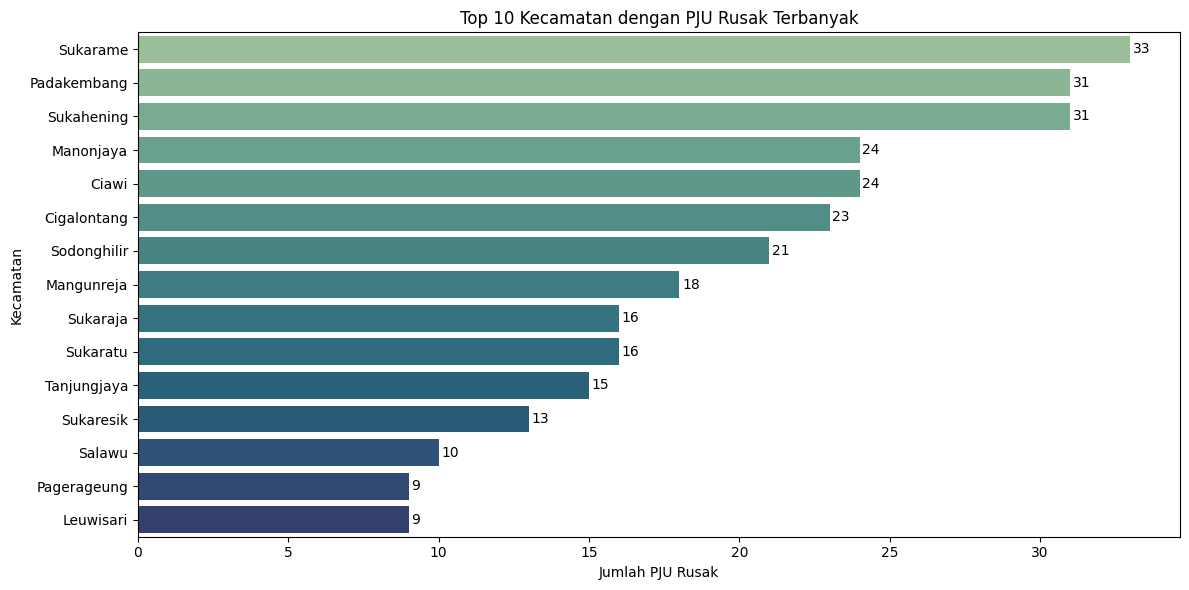

In [39]:
# Visualisasi Top 10 kecamatan dengan PJU rusak terbanyak
top10 = pju_summary.sort_values("rusak", ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="rusak", y="Kecamatan_Final", data=top10, palette="crest")

# Tambahkan label angka
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=2)

plt.title("Top 10 Kecamatan dengan PJU Rusak Terbanyak")
plt.xlabel("Jumlah PJU Rusak")
plt.ylabel("Kecamatan")
plt.tight_layout()
plt.savefig("top10_kecamatan_pju_rusak.png")
plt.show()


/tmp/ipython-input-417660186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="persen_rusak", y="Kecamatan_Final", data=top10_persen, palette="crest")


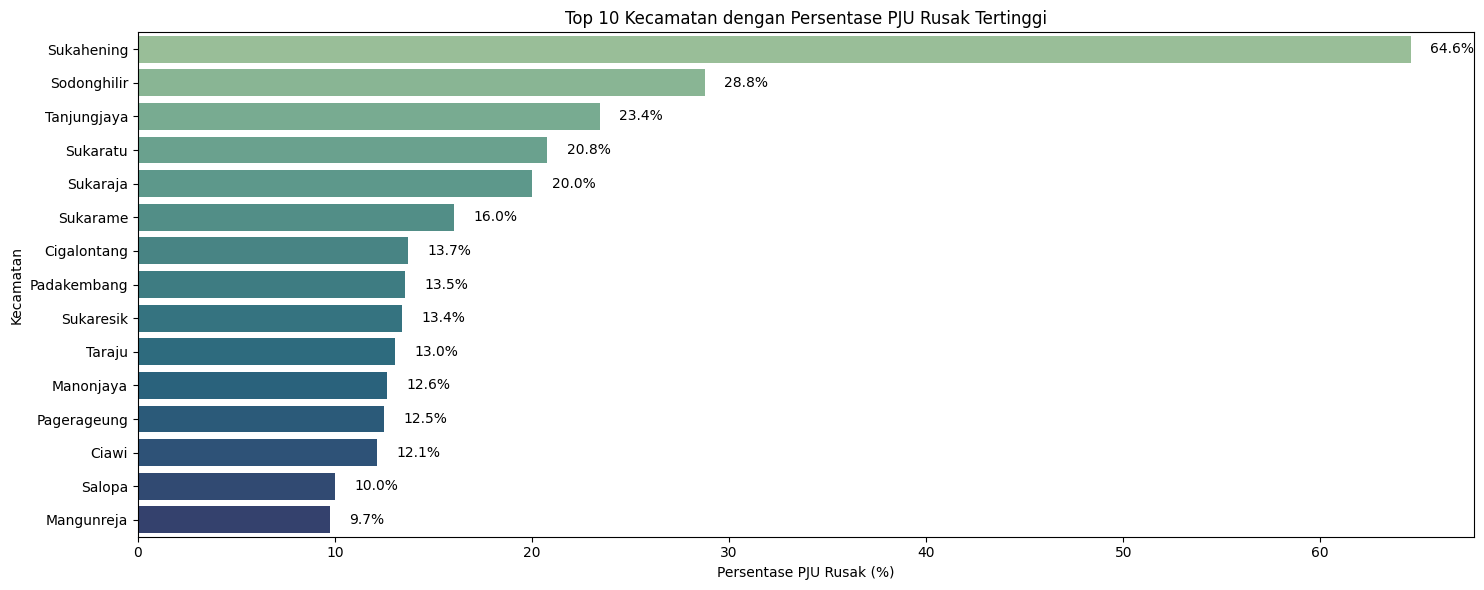

In [40]:
# Visualisasi: Top 10 Kecamatan dengan persentase PJU rusak tertinggi
top10_persen = pju_summary.sort_values("persen_rusak", ascending=False).head(15)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x="persen_rusak", y="Kecamatan_Final", data=top10_persen, palette="crest")
plt.title("Top 10 Kecamatan dengan Persentase PJU Rusak Tertinggi")
plt.xlabel("Persentase PJU Rusak (%)")
plt.ylabel("Kecamatan")

# Tambahkan label angka persentase
for i, v in enumerate(top10_persen["persen_rusak"]):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.savefig("top10_kecamatan_persen_rusak.png")
plt.show()

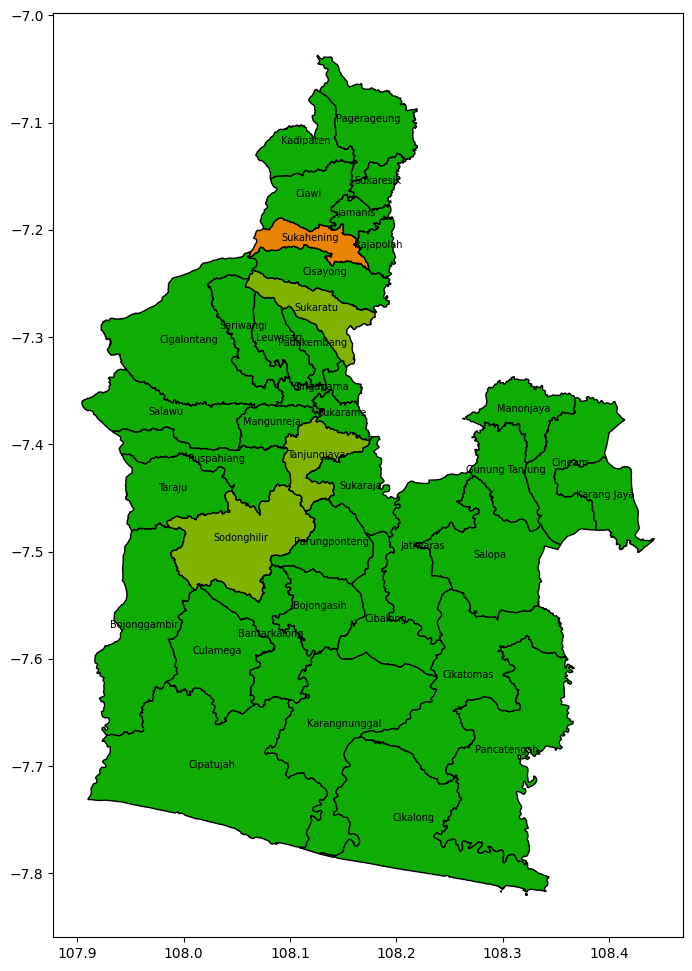

In [41]:
# Plot peta kecamatan (warna sesuai kategori rusak)
fig, ax = plt.subplots(figsize=(10, 12))
gdf_kec_stat.plot(
    ax=ax,
    color=gdf_kec_stat["Kategori_Warna"],
    edgecolor="black"
)

# Tambahkan label nama kecamatan di tengah polygon / multipolygon
for idx, row in gdf_kec_stat.iterrows():
    geom = row["geometry"]

    if geom.geom_type == "Polygon":
        # centroid langsung
        x, y = geom.centroid.coords[0]
    elif geom.geom_type == "MultiPolygon":
        # ambil poligon terbesar di dalam multipolygon
        largest_poly = max(geom.geoms, key=lambda a: a.area)
        x, y = largest_poly.centroid.coords[0]
    else:
        continue  # skip kalau bukan polygon

    ax.text(x, y, row["nm_kecamatan"], fontsize=7, ha="center")

In [42]:
import folium
from branca.element import Template, MacroElement

# Buat map center di tengah Kab. Tasikmalaya
m = folium.Map(location=[gdf_joined["Latitude"].mean(), gdf_joined["Longitude"].mean()], zoom_start=10)

# === Layer Kecamatan ===
kecamatan_layer = folium.FeatureGroup(name="Kecamatan", show=True)
folium.GeoJson(
    gdf_kec_stat,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["Kategori_Warna"],
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["nm_kecamatan", "total_pju", "rusak", "persen_rusak"],
        aliases=["Kecamatan", "Total PJU", "Jumlah Rusak", "Persentase Rusak"],
        localize=True
    )
).add_to(kecamatan_layer)
kecamatan_layer.add_to(m)

# === Layer PJU Baik ===
baik_layer = folium.FeatureGroup(name="PJU Baik", show=True)
for idx, row in gdf_joined[gdf_joined["Kondisi_Biner"] == 0].iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=0.8,
        color="black",
        fill=True,
        fill_color="black",
        fill_opacity=0.7,
        popup=folium.Popup(f"""
            Kecamatan: {row['Kecamatan_Final']}<br>
            Kondisi: Baik<br>
            Jenis Lampu: {row.get('Jenis Lampu', 'Tidak diketahui')}
        """, max_width=250)
    ).add_to(baik_layer)
baik_layer.add_to(m)

# === Layer PJU Rusak ===
rusak_layer = folium.FeatureGroup(name="PJU Rusak", show=True)
for idx, row in gdf_joined[gdf_joined["Kondisi_Biner"] == 1].iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=0.8,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.8,
        popup=folium.Popup(f"""
            Kecamatan: {row['Kecamatan_Final']}<br>
            Kondisi: Rusak<br>
            Jenis Lampu: {row.get('Jenis Lampu', 'Tidak diketahui')}
        """, max_width=250)
    ).add_to(rusak_layer)
rusak_layer.add_to(m)

# Tambahkan control layer (checkbox)
folium.LayerControl(collapsed=False).add_to(m)

# === Tambahkan Legend (Kotak Keterangan) ===
legend_html = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed;
    bottom: 20px; left: 20px; width: 150px; height: 70px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:12px;
    ">
    &nbsp;<b>Keterangan PJU</b><br>
    &nbsp;<i style="background:red; border-radius:50%; width:10px; height:10px; display:inline-block"></i>&nbsp; Rusak<br>
    &nbsp;<i style="background:black; border-radius:50%; width:10px; height:10px; display:inline-block"></i>&nbsp; Baik
</div>

{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)

# Simpan ke HTML
m.save("peta_pju_tasik.html")
print("✅ Peta interaktif dengan legend tersimpan sebagai 'peta_pju_tasik.html'")


✅ Peta interaktif dengan legend tersimpan sebagai 'peta_pju_tasik.html'


In [43]:
output_path = os.path.join(os.getcwd(), "peta_pju_tasik.html")
m.save(output_path)
print(f"Peta interaktif tersimpan di: {output_path}")


Peta interaktif tersimpan di: /content/peta_pju_tasik.html


In [44]:
from google.colab import files
files.download("/content/peta_pju_tasik.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Penerapan algoritma Decision Tree

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Pilih fitur kategorikal yang relevan
X = gdf_joined[["Jenis Lampu", "Jenis Tiang", "Jenis PJU"]].copy()
y = gdf_joined["Kondisi_Biner"]

In [47]:
# One-hot encoding untuk variabel kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

In [48]:
# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

In [49]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
# Prediksi
y_pred = clf.predict(X_test)

In [51]:
# Evaluasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1254
           1       0.00      0.00      0.00       102

    accuracy                           0.92      1356
   macro avg       0.46      0.50      0.48      1356
weighted avg       0.86      0.92      0.89      1356



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


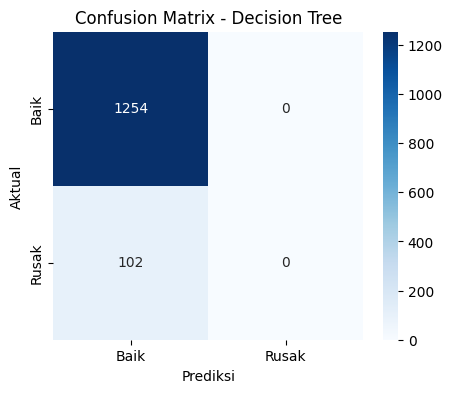

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Baik", "Rusak"], yticklabels=["Baik", "Rusak"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

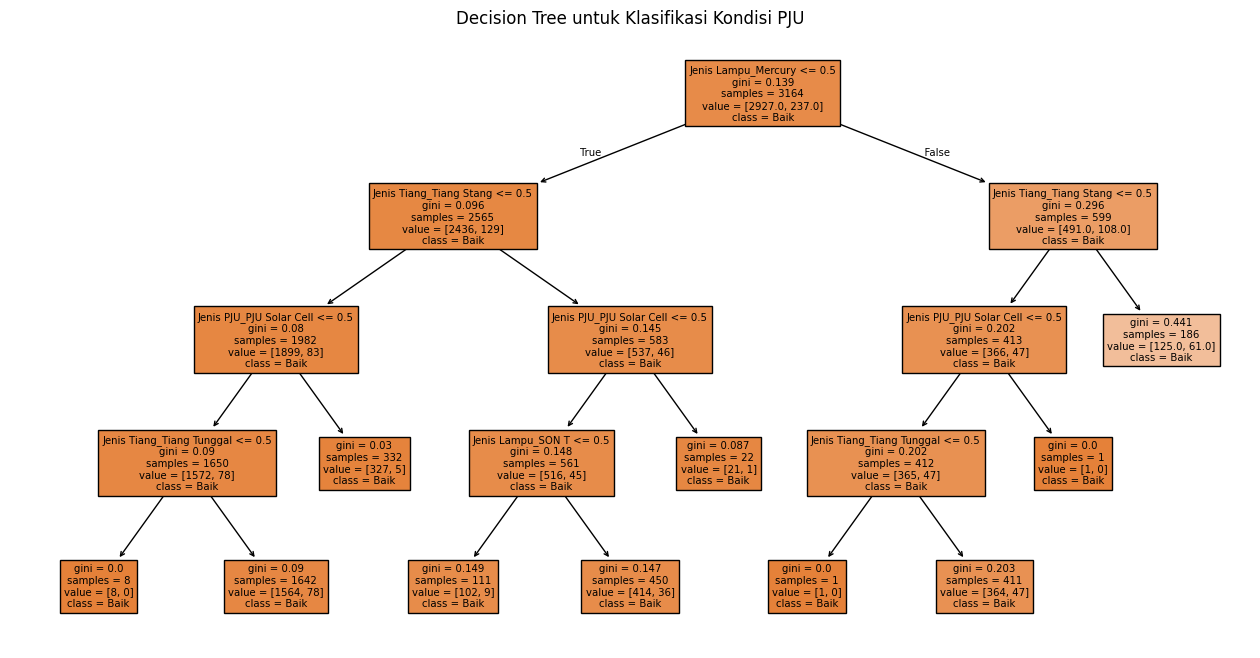

In [53]:
# Visualisasi Pohon Keputusan
plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X_encoded.columns, class_names=["Baik", "Rusak"], filled=True)
plt.title("Decision Tree untuk Klasifikasi Kondisi PJU")
plt.show()

# Visualisasi Insight Atribut

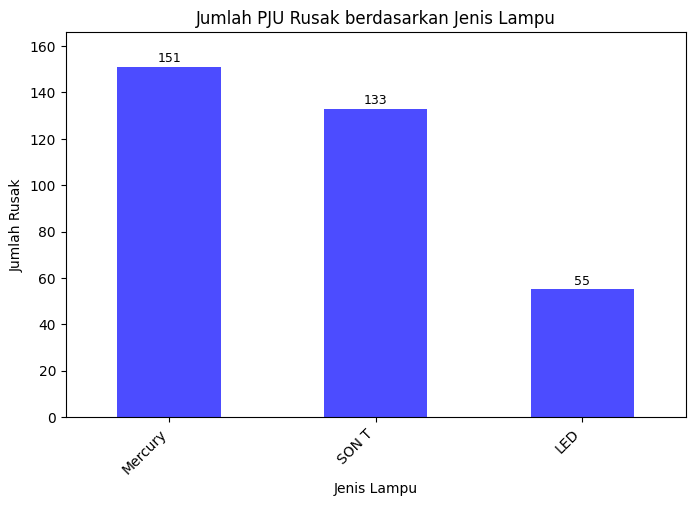

In [54]:
# === Jumlah rusak per jenis lampu ===
lampu_stats = gdf_joined.groupby("Jenis Lampu")["Kondisi_Biner"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = lampu_stats.plot(kind="bar", color="blue", alpha=0.7)
plt.ylabel("Jumlah Rusak")
plt.title("Jumlah PJU Rusak berdasarkan Jenis Lampu")
plt.xticks(rotation=45, ha="right")

# Tambahkan angka di atas bar
for i, v in enumerate(lampu_stats):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

plt.ylim(0, lampu_stats.max() * 1.1)  # biar ada space di atas
plt.show()


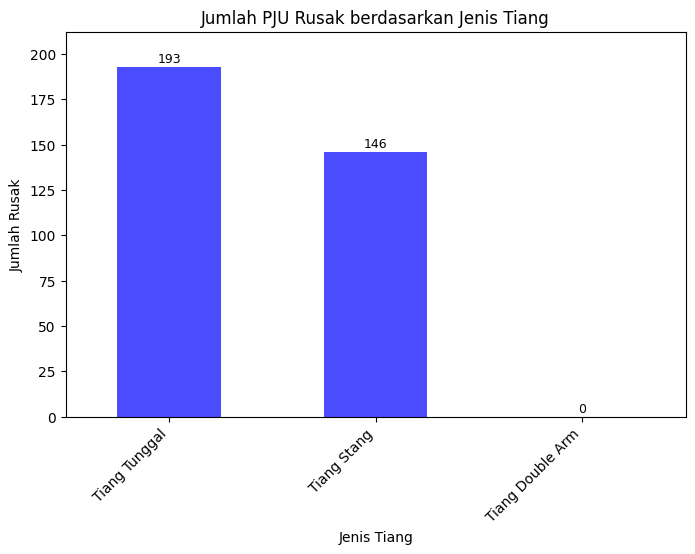

In [55]:
# === Jumlah rusak per jenis tiang ===
tiang_stats = gdf_joined.groupby("Jenis Tiang")["Kondisi_Biner"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = tiang_stats.plot(kind="bar", color="blue", alpha=0.7)
plt.ylabel("Jumlah Rusak")
plt.title("Jumlah PJU Rusak berdasarkan Jenis Tiang")
plt.xticks(rotation=45, ha="right")

# Tambahkan angka di atas bar
for i, v in enumerate(tiang_stats):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

plt.ylim(0, tiang_stats.max() * 1.1)
plt.show()

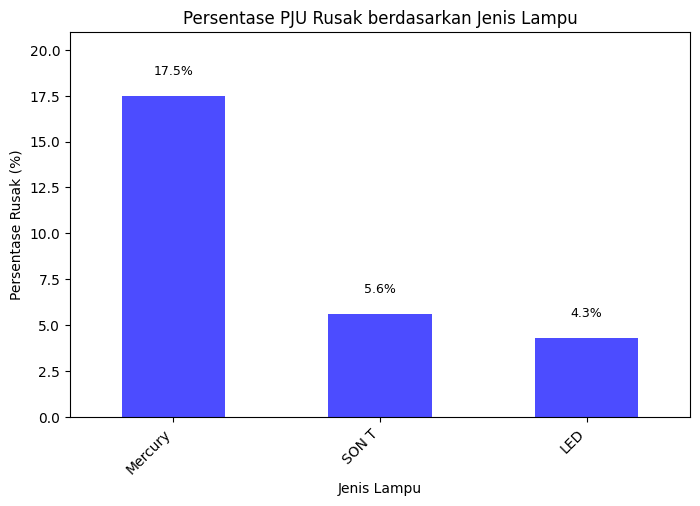

In [56]:
import matplotlib.pyplot as plt

# === 1. Persentase rusak per jenis lampu ===
lampu_total = gdf_joined.groupby("Jenis Lampu")["Kondisi_Biner"].count()
lampu_rusak = gdf_joined.groupby("Jenis Lampu")["Kondisi_Biner"].sum()
lampu_persen = (lampu_rusak / lampu_total * 100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = lampu_persen.plot(kind="bar", color="blue", alpha=0.7)
plt.ylabel("Persentase Rusak (%)")
plt.title("Persentase PJU Rusak berdasarkan Jenis Lampu")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(lampu_persen):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)

plt.ylim(0, lampu_persen.max() * 1.2)
plt.show()

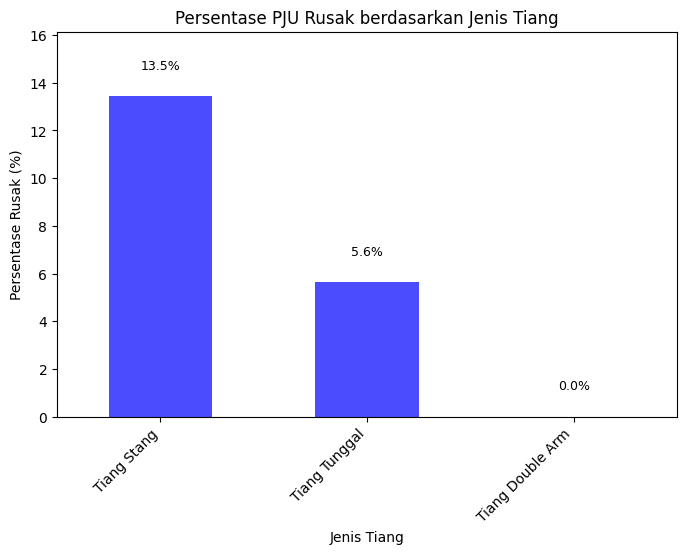

In [57]:
# === 2. Persentase rusak per jenis tiang ===
tiang_total = gdf_joined.groupby("Jenis Tiang")["Kondisi_Biner"].count()
tiang_rusak = gdf_joined.groupby("Jenis Tiang")["Kondisi_Biner"].sum()
tiang_persen = (tiang_rusak / tiang_total * 100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = tiang_persen.plot(kind="bar", color="blue", alpha=0.7)
plt.ylabel("Persentase Rusak (%)")
plt.title("Persentase PJU Rusak berdasarkan Jenis Tiang")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(tiang_persen):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)

plt.ylim(0, tiang_persen.max() * 1.2)
plt.show()

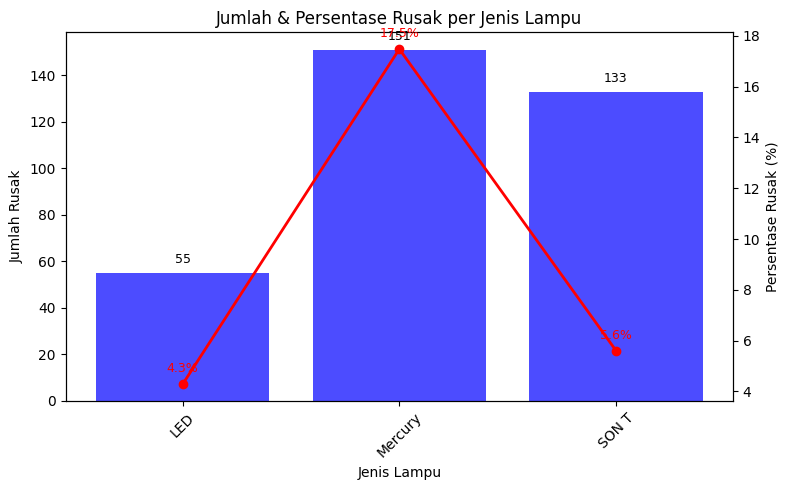

In [58]:
# === Gabungan jumlah & persentase rusak per jenis lampu (rapi) ===
fig, ax1 = plt.subplots(figsize=(8,5))

# Urutkan berdasarkan total lampu agar konsisten
order = lampu_rusak.index

# Bar jumlah rusak
ax1.bar(order, lampu_rusak[order].values, color="blue", alpha=0.7, label="Jumlah Rusak")
ax1.set_ylabel("Jumlah Rusak")
ax1.set_xlabel("Jenis Lampu")
ax1.tick_params(axis="x", rotation=45)

# Tambahkan angka jumlah di atas bar
for i, v in enumerate(lampu_rusak[order].values):
    ax1.text(i, v + (lampu_rusak.max()*0.02), str(v), ha="center", va="bottom", fontsize=9)

# Line persentase rusak (pakai urutan sama)
ax2 = ax1.twinx()
ax2.plot(order, lampu_persen[order].values, color="red", marker="o", linewidth=2, label="Persentase Rusak (%)")
ax2.set_ylabel("Persentase Rusak (%)")

# Tambahkan angka di titik line
for i, v in enumerate(lampu_persen[order].values):
    ax2.text(i, v + (lampu_persen.max()*0.02), f"{v:.1f}%", ha="center", va="bottom", fontsize=9, color="red")

plt.title("Jumlah & Persentase Rusak per Jenis Lampu")
fig.tight_layout()
plt.show()


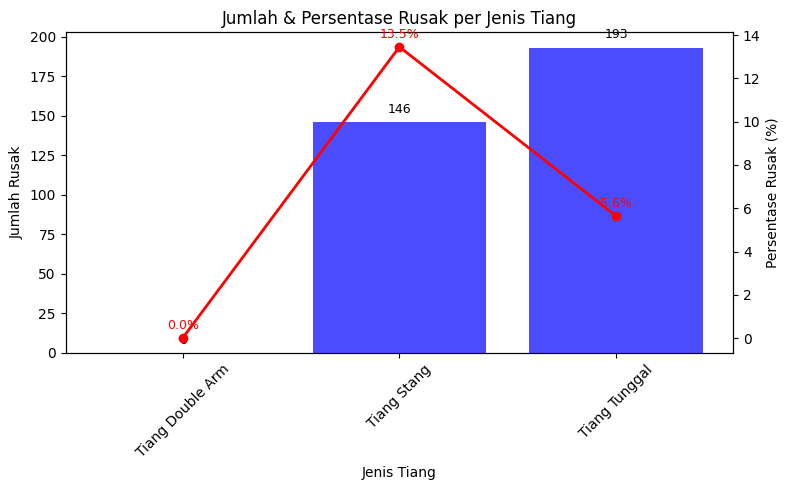

In [59]:
# === Gabungan jumlah & persentase rusak per jenis tiang ===
fig, ax1 = plt.subplots(figsize=(8,5))

# Urutkan berdasarkan jumlah rusak agar konsisten
order_tiang = tiang_rusak.index

# Bar jumlah rusak
ax1.bar(order_tiang, tiang_rusak[order_tiang].values, color="blue", alpha=0.7, label="Jumlah Rusak")
ax1.set_ylabel("Jumlah Rusak")
ax1.set_xlabel("Jenis Tiang")
ax1.tick_params(axis="x", rotation=45)

# Tambahkan angka jumlah di atas bar
for i, v in enumerate(tiang_rusak[order_tiang].values):
    ax1.text(i, v + (tiang_rusak.max()*0.02), str(v), ha="center", va="bottom", fontsize=9)

# Line persentase rusak (pakai urutan sama)
ax2 = ax1.twinx()
ax2.plot(order_tiang, tiang_persen[order_tiang].values, color="red", marker="o", linewidth=2, label="Persentase Rusak (%)")
ax2.set_ylabel("Persentase Rusak (%)")

# Tambahkan angka di titik line
for i, v in enumerate(tiang_persen[order_tiang].values):
    ax2.text(i, v + (tiang_persen.max()*0.02), f"{v:.1f}%", ha="center", va="bottom", fontsize=9, color="red")

plt.title("Jumlah & Persentase Rusak per Jenis Tiang")
fig.tight_layout()
plt.show()


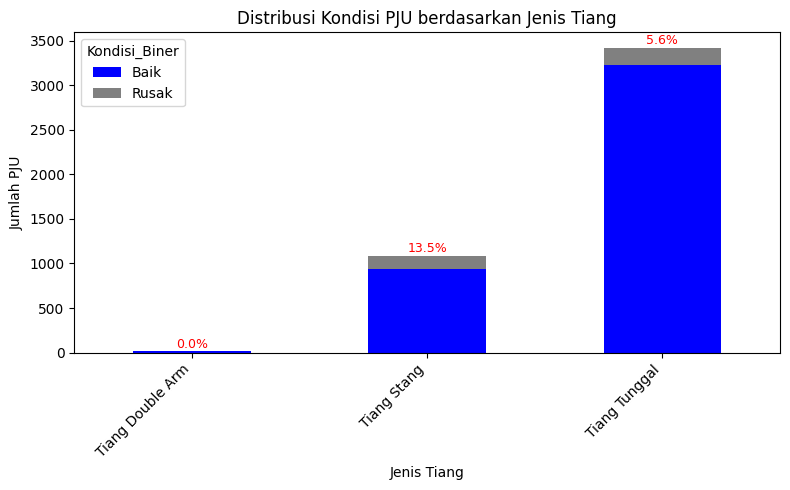

In [60]:
# === Stacked bar: Baik vs Rusak per Jenis Tiang ===
tiang_counts = gdf_joined.groupby(["Jenis Tiang", "Kondisi_Biner"]).size().unstack(fill_value=0)
tiang_counts = tiang_counts.rename(columns={0: "Baik", 1: "Rusak"})

tiang_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=["blue", "grey"]
)

plt.ylabel("Jumlah PJU")
plt.title("Distribusi Kondisi PJU berdasarkan Jenis Tiang")
plt.xticks(rotation=45, ha="right")

# Tambahkan persentase di atas bar (persentase rusak)
for i, total in enumerate(tiang_counts.sum(axis=1)):
    rusak = tiang_counts.iloc[i]["Rusak"]
    persen_rusak = (rusak / total) * 100 if total > 0 else 0
    plt.text(i, total + 5, f"{persen_rusak:.1f}%", ha="center", va="bottom", fontsize=9, color="red")

plt.tight_layout()
plt.show()


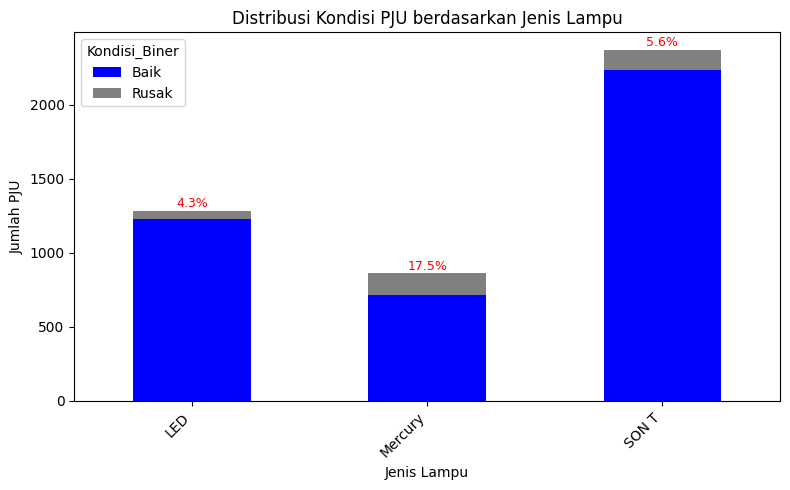

In [61]:
# === Stacked bar: Baik vs Rusak per Jenis Lampu ===
lampu_counts = gdf_joined.groupby(["Jenis Lampu", "Kondisi_Biner"]).size().unstack(fill_value=0)
lampu_counts = lampu_counts.rename(columns={0: "Baik", 1: "Rusak"})

ax = lampu_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=["blue", "grey"]
)

plt.ylabel("Jumlah PJU")
plt.title("Distribusi Kondisi PJU berdasarkan Jenis Lampu")
plt.xticks(rotation=45, ha="right")

# Tambahkan persentase rusak di atas bar
for i, total in enumerate(lampu_counts.sum(axis=1)):
    rusak = lampu_counts.iloc[i]["Rusak"]
    persen_rusak = (rusak / total) * 100 if total > 0 else 0
    plt.text(i, total + 3, f"{persen_rusak:.1f}%", ha="center", va="bottom", fontsize=9, color="red")

plt.tight_layout()
plt.show()


# Kesimpulan Analisis Kondisi PJU Kabupaten Tasikmalaya

**Berdasarkan Jenis Tiang**

- Tiang Stang memiliki tingkat kerusakan paling tinggi, yaitu sekitar 13.5% dari total tiang stang yang ada.

- Tiang Tunggal walaupun jumlah rusaknya lebih banyak (193 unit), namun karena populasinya jauh lebih besar, persentase kerusakannya relatif lebih kecil (5.6%).

- Tiang Double Arm hampir tidak ditemukan kerusakan (0%), meskipun jumlah totalnya sedikit.

👉 Implikasi: Tiang Stang perlu menjadi prioritas utama dalam perawatan karena proporsi rusaknya lebih tinggi dibanding jenis tiang lain.

**Berdasarkan Jenis Lampu**

- Lampu Mercury menunjukkan kerusakan paling tinggi secara persentase (17.5%) dan juga paling besar jumlah rusaknya (151 unit).

- Lampu SON T memiliki jumlah kerusakan tinggi (133 unit), tetapi persentasenya lebih rendah (5.6%) karena populasinya banyak.

- Lampu LED relatif paling awet, hanya sekitar 4.3% yang rusak (55 unit).

👉 Implikasi: Lampu Mercury menjadi jenis lampu dengan reliabilitas terendah, sementara LED lebih tahan lama sehingga cocok diprioritaskan untuk penggantian di masa depan.

# Kesimpulan Umum

- Secara jumlah, kerusakan paling banyak ditemukan pada Tiang Tunggal dan Lampu Mercury.

- Namun jika dilihat persentasenya, yang paling rentan rusak adalah Tiang Stang dan Lampu Mercury.

**Rekomendasi:**

- Prioritaskan pemeliharaan pada Tiang Stang dan Lampu Mercury.

- Pertimbangkan menggunakan lampu Mercury dengan LED untuk menekan tingkat kerusakan.

# Catatan Penting

Hasil analisis ini perlu ditafsirkan dengan hati-hati karena:

- Variabel dalam dataset terbatas → hanya mencakup jenis lampu, jenis tiang, dan kondisi (baik/rusak), tanpa mempertimbangkan faktor-faktor lain yang juga memengaruhi kerusakan, seperti:

  - umur/usia pemasangan,

  - kualitas instalasi,

  - kondisi lingkungan (misalnya kelembapan, cuaca ekstrem, atau lokasi rawan kecelakaan),

  - intensitas pemakaian.

- Distribusi data tidak merata → beberapa kategori (contoh: Tiang Double Arm) jumlah populasinya sangat sedikit sehingga persentase kerusakan bisa tampak ekstrem atau menyesatkan.

- Data statis → analisis ini bersifat potret sesaat, belum mencakup dinamika kerusakan seiring waktu.

Dengan keterbatasan ini, hasil analisis lebih tepat diposisikan sebagai indikasi awal untuk menentukan prioritas pemeliharaan, bukan sebagai kesimpulan final tentang performa tiap jenis lampu/tiang.